# Laboratorio 8
## Puesta en producción de un modelo de ML
### Integrantes
* Marco Orozco  20857
* Gabriel Vicente Lorenzo 20498

<b>Contexto:</b> El mercado inmobiliario en las grandes ciudades brasileñas ha experimentado 
cambios significativos en los últimos años debido a factores socioeconómicos y de 
desarrollo urbano. Es vital para las agencias inmobiliarias y los inversores comprender los
factores que influyen en el precio del alquiler de viviendas para tomar decisiones 
informadas.<br><br>
<b>Objetivo:</b> Reforzar el aprendizaje en selección de modelos y despliegue de soluciones de
Machine Learning utilizando un conjunto de datos sobre alquiler de viviendas en Brasil.

In [14]:

""" Librerias """

import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Parte 1: Selección de Modelo

### Exploración y preprocesamiento de datos: 10 puntos

In [17]:


""" Lectura de data y transformaciones simples """

data = pd.read_csv("houses_to_rent_v2.csv")
data = data.dropna()
label_encoder = LabelEncoder()
data["city"] = label_encoder.fit_transform(data["city"])
city_labels = label_encoder.classes_
for label, city in enumerate(city_labels):
    print(f"Número {label} corresponde a la ciudad: {city}")

data["animal"] = label_encoder.fit_transform(data["animal"])
data["furniture"] = label_encoder.fit_transform(data["furniture"])


Número 0 corresponde a la ciudad: Belo Horizonte
Número 1 corresponde a la ciudad: Campinas
Número 2 corresponde a la ciudad: Porto Alegre
Número 3 corresponde a la ciudad: Rio de Janeiro
Número 4 corresponde a la ciudad: São Paulo


In [3]:

""" Division de data de entrenamiento y variable objetivo """

X = data[["city", "area", "rooms", "bathroom", "parking spaces", "floor", "animal", "furniture", "hoa (R$)"]]
y = data["rent amount (R$)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Las siguientes graficas son una rapida exploracion de la data que nos permite visualizar variables de moda, rangos, frecuencias y distribuciones, además de permitir la clasificacion de variables cualitativas y asociar valores de renta

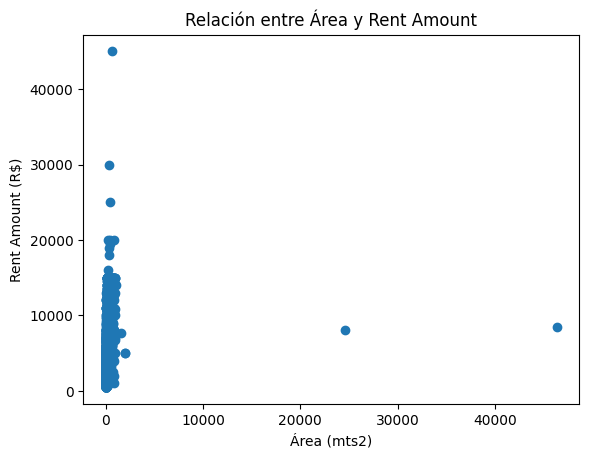

In [4]:
plt.scatter(X_train["area"], y_train)
plt.xlabel("Área (mts2)")
plt.ylabel("Rent Amount (R$)")
plt.title("Relación entre Área y Rent Amount")
plt.show()

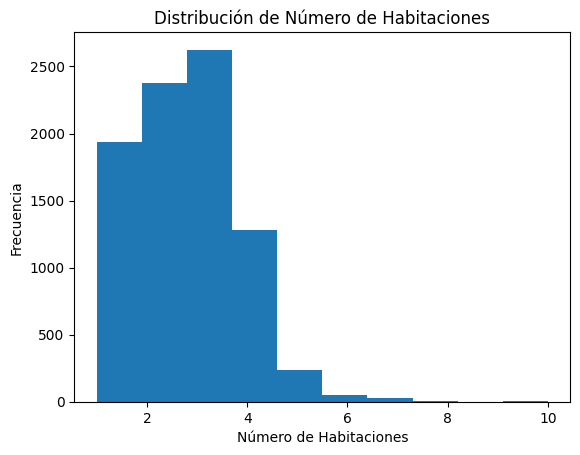

In [5]:
plt.hist(X_train["rooms"], bins=10)
plt.xlabel("Número de Habitaciones")
plt.ylabel("Frecuencia")
plt.title("Distribución de Número de Habitaciones")
plt.show()

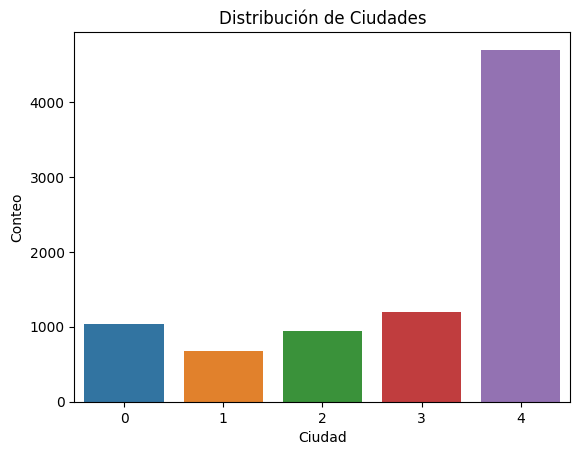

In [6]:
sns.countplot(x="city", data=X_train)
plt.xlabel("Ciudad")
plt.ylabel("Conteo")
plt.title("Distribución de Ciudades")
plt.show()

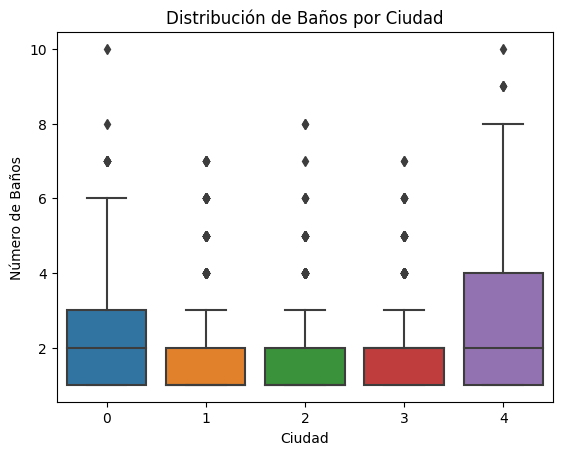

In [7]:
sns.boxplot(x="city", y="bathroom", data=X_train)
plt.xlabel("Ciudad")
plt.ylabel("Número de Baños")
plt.title("Distribución de Baños por Ciudad")
plt.show()

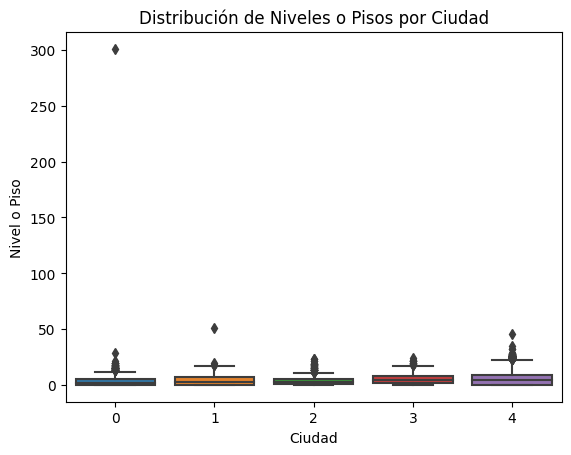

In [8]:
sns.boxplot(x="city", y="floor", data=X_train)
plt.xlabel("Ciudad")
plt.ylabel("Nivel o Piso")
plt.title("Distribución de Niveles o Pisos por Ciudad")
plt.show()

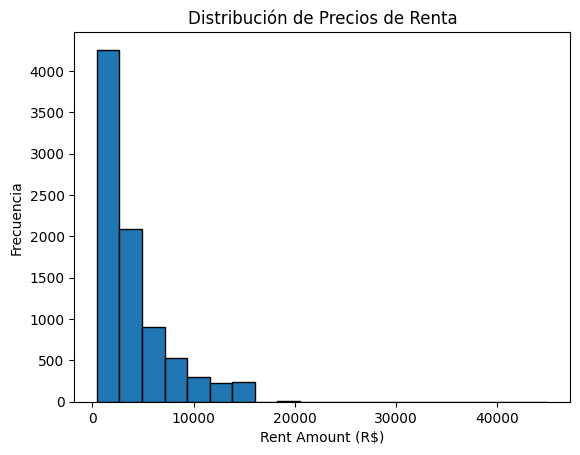

In [9]:
plt.hist(y_train, bins=20, edgecolor='k')
plt.xlabel("Rent Amount (R$)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de Renta")
plt.show()

### Entrenamiento y selección de modelos: 20 puntos.

In [10]:

""" Modelo Random Forest """

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse_random = np.sqrt(mse)  # Para el modelo de regresión de árbol de decisión

# Imprimir el valor del RMSE
print("Root Mean Squared Error (RMSE) - Árbol de Decisión:", rmse_random)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R2):", r2)


""" Prueba de prediccion modelo Random Forest """
new_data = pd.DataFrame({
    "city": [1],  # Código de la ciudad
    "area": [100],
    "rooms": [3],
    "bathroom": [2],
    "parking spaces": [2],
    "floor": [5],
    "animal": [1],  # 1 si se permiten animales, 0 si no
    "furniture": [1],  # 1 si está amueblado, 0 si no
    "hoa (R$)": [300]  # Impuesto de la Asociación de Residentes
})

predicted_rent = model.predict(new_data)
print("Predicción de alquiler mensual:", predicted_rent)


Root Mean Squared Error (RMSE) - Árbol de Decisión: 2071.942143440553
Error Cuadrático Medio (MSE): 4292944.245765033
Coeficiente de Determinación (R2): 0.6113776372105946
Predicción de alquiler mensual: [1828.65]


In [11]:
#  Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Realizar la predicción en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, y_pred)
rmse_lineal = np.sqrt(mse)  # Para el modelo de regresión de árbol de decisión

# Imprimir el valor del RMSE
print("Root Mean Squared Error (RMSE) - Árbol de Decisión:", rmse_lineal)

# Imprimir los resultados
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

# Realizar la predicción con nuevos datos
new_data = pd.DataFrame({
    "city": [0],
    "area": [100],
    "rooms": [3],
    "bathroom": [2],
    "parking spaces": [2],
    "floor": [5],
    "animal": [1],
    "furniture": [1],
    "hoa (R$)": [300]
})

predicted_rent = linear_model.predict(new_data)



print("Predicción de alquiler mensual (Regresión Lineal):", predicted_rent)

Root Mean Squared Error (RMSE) - Árbol de Decisión: 2287.3350356931437
Error Cuadrático Medio (MSE): 5231901.565509356
Coeficiente de Determinación (R^2): 0.526377741738526
Predicción de alquiler mensual (Regresión Lineal): [2895.99764066]


In [12]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Realizar la predicción en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y R^2
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Imprimir los resultados
print("Error Cuadrático Medio (MSE) - Árbol de Decisión:", mse_tree)
print("Coeficiente de Determinación (R^2) - Árbol de Decisión:", r2_tree)

rmse_tree = np.sqrt(mse_tree)  # Para el modelo de regresión de árbol de decisión

# Imprimir el valor del RMSE
print("Root Mean Squared Error (RMSE) - Árbol de Decisión:", rmse_tree)

new_data = pd.DataFrame({
    "city": [0],
    "area": [100],
    "rooms": [3],
    "bathroom": [2],
    "parking spaces": [2],
    "floor": [5],
    "animal": [1],
    "furniture": [1],
    "hoa (R$)": [300]
})

predicted_rent = tree_model.predict(new_data)

print("Predicción de alquiler mensual (Regresión Lineal):", predicted_rent)

Error Cuadrático Medio (MSE) - Árbol de Decisión: 8084313.804940087
Coeficiente de Determinación (R^2) - Árbol de Decisión: 0.26816074177852645
Root Mean Squared Error (RMSE) - Árbol de Decisión: 2843.2927751007433
Predicción de alquiler mensual (Regresión Lineal): [2300.]


### Interpretación de resultados y métricas: 10 puntos.

Para este apartado se priorizo una evaluación certera con la afinidad a los datos con R2, RMSE y MSE. Al finalizar esto se pudo apreciar que Random Forest dio una mayor afinidad respecto a los modelos lineales y arboles de decisiones simples. Aunque la afinidad aun es baja, al ser estimaciones se puede argumentar que es una cuestion valida ya que no es el precio final. Además, se tiene en consideración que la parte primordial es el despliegue en esta ocasión.

### Modelo Random Forest seleccionado

In [13]:
# Guardar el modelo entrenado
model_filename = 'random_forest_model.pkl'
joblib.dump(model, model_filename)

['random_forest_model.pkl']

### 3.  Reflexión (5 puntos)
* Profundidad y calidad de la reflexión: 5 puntos.

La funcionalidad de esta implementación interactiva del modelo de predicción de alquiler es efectiva, proporcionando a los usuarios una herramienta práctica para estimar el costo mensual de una propiedad. La inclusión del modelo en una interfaz de usuario accesible subraya su utilidad en situaciones cotidianas.

Es fundamental resaltar que el modelo parece estar operando dentro de márgenes de predicción aceptables, lo que sugiere que las estimaciones son bastante precisas. No obstante, siempre hay espacio para mejoras. Para fortalecer el modelo, se podría considerar la adquisición de más información y datos adicionales para enriquecer el conjunto de datos de entrenamiento.

Ampliando este conjunto de datos con características adicionales, como la ubicación geográfica específica, servicios cercanos, tasas de criminalidad, entre otros, es posible incrementar la precisión del modelo. Posteriormente, estos datos mejorados se pueden utilizar para reentrenar el modelo existente. La ventaja de esta implementación interactiva radica en que solo requerirá una actualización del modelo subyacente, manteniendo la interfaz de usuario inalterada y lista para aprovechar los nuevos conocimientos. Esto ejemplifica la flexibilidad y escalabilidad de la aplicación.